In [33]:
# Cargar librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
Osa_df= pd.read_csv("Osa_df.csv")

In [4]:
# Verificar valores nulos
Osa_df.isnull().sum(axis= 1)

0        0
1        0
2        0
3        0
4        0
        ..
35152    0
35153    0
35154    0
35155    0
35156    0
Length: 35157, dtype: int64

In [5]:
Osa_df.dtypes

Id_Prod_2            int64
Año_Compra           int64
Mes_Compra           int64
Costo_Compra       float64
Fecha               object
Nombre_Prod         object
Tipo_Prod           object
Proveedor           object
Categoria_Prod      object
Cant_Prod_Venta    float64
Precio_Prod        float64
Año_Venta            int64
Mes_Venta            int64
dtype: object

In [6]:
# se localizan casillas con variable "error" en la columna Categoria_prod identificadas previamente
categoria_error=Osa_df.loc[Osa_df["Categoria_Prod"] == "Error"]
categoria_error

,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta
4171,4311,2021,3,5.40,2021-03,Trucha a la soriana. Dos raciones 300-400gr,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,Error,7.0,7.40,2021,3
4172,4312,2021,3,5.25,2021-03,Trucha al natural. Dos raciones 300-400gr,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,Error,4.0,7.20,2021,3
4173,4313,2021,3,5.90,2021-03,Bacalao con piquillo. Dos raciones 350-400gr,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,Error,10.0,8.10,2021,3
4174,4314,2021,3,6.65,2021-03,Lubina con langostino. 330gr,Convencional,(ALMAZÁN PESCADOS Y MARISCOS) MANUEL ALMAZÁN OTEO,Error,8.0,9.15,2021,3


In [7]:
#### ASIGNAREMOS EL DATAFRAME DF_OSA A OSA_CATEGO_SUBCATEGO PARA ANALIZAR POR CATEGORIAS y SUBACATEGORIAS
# Estos gráficos lo realizaremos en secciones más abajo
df_catego_subcatego=Osa_df
df_catego_subcatego

,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta
0,9,2021,1,5.43,2021-01,Aceite coco Maya gold 450 ml,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1
1,13,2021,1,2.91,2021-01,Aceite de girasol Virgen bio Franciscanos 1 L,Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1
2,18,2021,1,12.94,2021-01,Aceite oliva virgen extra Umbria Oretana 2.5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",9.000,18.50,2021,1
3,20,2021,1,22.95,2021-01,Aceite oliva virgen extra Umbria oretana 5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",5.000,32.75,2021,1
4,23,2021,1,15.58,2021-01,Aceite rosa mosqueta y damáscena Piel sana 50 ml,Eco,(PIELSANA) PIELSANA S.COOP.MAD.,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1.000,26.20,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35152,6502,2022,12,11.01,2022-12,Pularda deshuesada Sanchonar aprox 3 kg,False,(SANCHONAR) SANCHONAR S.L.,Resto Producto Fresco / Carnes frescas / Aves,7.095,15.10,2022,12
35153,6508,2022,12,13.96,2022-12,Pack Veer 8 botellas 33cl,Eco,(VEER) MISSON S.COOP.CYL.,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",1.000,21.95,2022,12
35154,6511,2022,12,2.23,2022-12,Láminas lasagña de sémola Castagno 500 g,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Arroces, pastas, sémolas y leg...",2.000,3.35,2022,12
35155,6515,2022,12,2.06,2022-12,Yogur de avena natural Alpro 500 gr,Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.","Resto Producto Fresco / Leche, zumos, producto...",1.000,2.85,2022,12


In [8]:
# se recategorizan los campos de categoria_prod que tenian el vale "Error" ya que al revisarlos manualmente se nota que se pueden incluir en la categoría `Resto producto Fresco'
Osa_df['Categoria_Prod'] = np.where((Osa_df.Categoria_Prod == "Error"), 'Resto Producto Fresco / Pescados y mariscos / Pescado fresco', Osa_df.Categoria_Prod)
Osa_df.Categoria_Prod.unique().tolist()

['Seco Envasado / Aceites, aliños y condimentos / Aceites',
 'Droguería, Perfumería, Limpieza, Higiene, Hogar / Parafarmacia y cosmética / Cuidado de la piel',
 'Seco Envasado / Encurtidos y aperitivos / Olivas y encurtidos',
 'Fruta y Verdura / Verdura / Verdura de cocinar',
 'Seco Envasado / Cafés e infusiones / Cafés y cacaos',
 'Fruta y Verdura / Fruta / Fruta de hueso',
 'Resto Producto Fresco / Carnes frescas / Cerdo',
 'Seco Envasado / Salsas / Salsas',
 'Seco Envasado / Conserva vegetal / Conserva vegetal',
 'Seco Envasado / Encurtidos y aperitivos / Frutos secos',
 'Seco Envasado / Caldo, cremas, plato preparado, conserva / Conserva de pescado',
 'Seco Envasado / Arroces, pastas, sémolas y legumbres / Arroces',
 'Resto Producto Fresco / Charcutería animal / Embutidos',
 'Seco Envasado / Desayunos y merienda / Tortitas y barritas',
 'Resto Producto Fresco / Leche, zumos, productos lácteos / Yogures y postres',
 'Seco Envasado / Zumos, leche y bebidas vegetales / Bebidas vegetal

In [9]:
# se identifican en la columna Tipo_prod 470 valores con False
Osa_df['Tipo_Prod'].value_counts()

Eco             24142
Convencional    10545
False             470
Name: Tipo_Prod, dtype: int64

In [10]:
#se recategorizan los campos incluyendolos en producto convencional 
Osa_df['Tipo_Prod'] = np.where((Osa_df.Tipo_Prod == 'False'), 'Convencional', Osa_df.Tipo_Prod)
Osa_df['Tipo_Prod'].value_counts()

Eco             24142
Convencional    11015
Name: Tipo_Prod, dtype: int64

In [11]:
#creamos una columna Categoría_principal para agrupar los datos en 6 categorias 

def tomar_primera_palabra(cadena):
    return cadena.split(' ')[0]

# aplica la función a la columna "Categoria_producto" del DataFrame
nueva_columna = Osa_df['Categoria_Prod'].apply(tomar_primera_palabra)

# asigna los valores de la nueva columna a la columna "categoria_principal" del DataFrame
Osa_df['Categoria_Principal'] = nueva_columna
Osa_df.head(5)

,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta,Categoria_Principal
0,9,2021,1,5.43,2021-01,Aceite coco Maya gold 450 ml,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",0.0,0.00,2021,1,Seco
1,13,2021,1,2.91,2021-01,Aceite de girasol Virgen bio Franciscanos 1 L,Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,"Seco Envasado / Aceites, aliños y condimentos ...",0.0,0.00,2021,1,Seco
2,18,2021,1,12.94,2021-01,Aceite oliva virgen extra Umbria Oretana 2.5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",9.0,18.50,2021,1,Seco
3,20,2021,1,22.95,2021-01,Aceite oliva virgen extra Umbria oretana 5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",5.0,32.75,2021,1,Seco
4,23,2021,1,15.58,2021-01,Aceite rosa mosqueta y damáscena Piel sana 50 ml,Eco,(PIELSANA) PIELSANA S.COOP.MAD.,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1.0,26.20,2021,1,"Droguería,"


In [12]:
# se revisan las columnas del dataset
Osa_df.columns.values

array(['Id_Prod_2', 'Año_Compra', 'Mes_Compra', 'Costo_Compra', 'Fecha',
       'Nombre_Prod', 'Tipo_Prod', 'Proveedor', 'Categoria_Prod',
       'Cant_Prod_Venta', 'Precio_Prod', 'Año_Venta', 'Mes_Venta',
       'Categoria_Principal'], dtype=object)

### ANALISIS DE LA INFLACIÓN 

### para el Analisis de inflación se creará un dataset con los valores de compra, venta, cantidades vendidas por año para cada producto, para apartir de alli realizar dicho analisis


In [13]:
# primero separamos los valores de compra promedio anual por producto
Variacion_Compra = Osa_df.pivot_table(index='Nombre_Prod',columns=('Año_Compra'),values='Costo_Compra', aggfunc='mean')
Variacion_Compra

Año_Compra,2021,2022
Nombre_Prod,,
Abrillantador Finish 500 ml,3.420000,3.570000
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000
Aceite caléndula y almendras Piel sana 100 ml,7.440000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560000
Aceite coco Maya gold 250 ml,3.580000,3.580000
...,...,...
patata roja AgroEc.,1.114000,0.990000
proteina de guisante texturizada Vegetalia 250g,NaN,2.240000
tomate seco unidad AgroEc,1.614083,1.718125


In [14]:
# separamos el promedio anual del precio de venta por producto
Variacion_Venta = Osa_df.pivot_table(index='Nombre_Prod',columns= str('Año_Venta'),values='Precio_Prod', aggfunc='mean')
Variacion_Venta

Año_Venta,2021,2022
Nombre_Prod,,
Abrillantador Finish 500 ml,4.250000,6.050000
Abrillantador lavavajillas Ecodoo 500 ml,4.550000,4.962500
Aceite caléndula y almendras Piel sana 100 ml,0.000000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,14.400000,0.000000
Aceite coco Maya gold 250 ml,3.566667,5.350000
...,...,...
patata roja AgroEc.,1.210000,1.400000
proteina de guisante texturizada Vegetalia 250g,NaN,3.150000
tomate seco unidad AgroEc,2.355909,2.441117


In [15]:
# de igual manera obtenemos el total de cantidades vendidas anuales por producto
Var_Cant_Venta = Osa_df.pivot_table(index='Nombre_Prod',columns= str('Año_Venta'),values='Cant_Prod_Venta', aggfunc='sum')
Var_Cant_Venta

Año_Venta,2021,2022
Nombre_Prod,,
Abrillantador Finish 500 ml,2.000,1.00
Abrillantador lavavajillas Ecodoo 500 ml,5.000,4.00
Aceite caléndula y almendras Piel sana 100 ml,0.000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,4.000,0.00
Aceite coco Maya gold 250 ml,3.000,6.00
...,...,...
patata roja AgroEc.,126.296,25.53
proteina de guisante texturizada Vegetalia 250g,NaN,11.00
tomate seco unidad AgroEc,40.000,82.00


### revisamos los valores nulos los cuales se producen por los meses donde no hay registro de compra o venta de productos, y al buscar el promedio se genera NaN

In [16]:
Variacion_Compra.isnull().sum()

Año_Compra
2021    664
2022    828
dtype: int64

In [17]:
Variacion_Venta.isnull().sum()

Año_Venta
2021    664
2022    828
dtype: int64

In [18]:
Var_Cant_Venta.isnull().sum()

Año_Venta
2021    664
2022    828
dtype: int64

In [19]:
# primero hacemos un merge de las compras y las cantidades vendidas
df_merged = pd.merge(Variacion_Compra, Var_Cant_Venta, on='Nombre_Prod')
df_merged

,2021_x,2022_x,2021_y,2022_y
Nombre_Prod,,,,
Abrillantador Finish 500 ml,3.420000,3.570000,2.000,1.00
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000,5.000,4.00
Aceite caléndula y almendras Piel sana 100 ml,7.440000,NaN,0.000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560000,4.000,0.00
Aceite coco Maya gold 250 ml,3.580000,3.580000,3.000,6.00
...,...,...,...,...
patata roja AgroEc.,1.114000,0.990000,126.296,25.53
proteina de guisante texturizada Vegetalia 250g,NaN,2.240000,NaN,11.00
tomate seco unidad AgroEc,1.614083,1.718125,40.000,82.00


In [20]:
# despues hacemos un merge de las compras con los valores de ventas
df_merged_2 = pd.merge(Variacion_Compra, Variacion_Venta, on='Nombre_Prod')
df_merged_2

,2021_x,2022_x,2021_y,2022_y
Nombre_Prod,,,,
Abrillantador Finish 500 ml,3.420000,3.570000,4.250000,6.050000
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000,4.550000,4.962500
Aceite caléndula y almendras Piel sana 100 ml,7.440000,NaN,0.000000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560000,14.400000,0.000000
Aceite coco Maya gold 250 ml,3.580000,3.580000,3.566667,5.350000
...,...,...,...,...
patata roja AgroEc.,1.114000,0.990000,1.210000,1.400000
proteina de guisante texturizada Vegetalia 250g,NaN,2.240000,NaN,3.150000
tomate seco unidad AgroEc,1.614083,1.718125,2.355909,2.441117


In [21]:
# cambiamos los nombres de las columnas 
Osa_inflation = df_merged.rename(columns={
    '2021_x': 'precio_compra_2021',
    '2022_x': 'precio_compra_2022',
    '2021_y': 'cantidad_vendida_2021',
    '2022_y': 'cantidad_vendida_2022',})
Osa_inflation

,precio_compra_2021,precio_compra_2022,cantidad_vendida_2021,cantidad_vendida_2022
Nombre_Prod,,,,
Abrillantador Finish 500 ml,3.420000,3.570000,2.000,1.00
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000,5.000,4.00
Aceite caléndula y almendras Piel sana 100 ml,7.440000,NaN,0.000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560000,4.000,0.00
Aceite coco Maya gold 250 ml,3.580000,3.580000,3.000,6.00
...,...,...,...,...
patata roja AgroEc.,1.114000,0.990000,126.296,25.53
proteina de guisante texturizada Vegetalia 250g,NaN,2.240000,NaN,11.00
tomate seco unidad AgroEc,1.614083,1.718125,40.000,82.00


In [24]:
# Ahora hacemos merge de la tabla resultante con la de compras y ventas para por fin obtener un dataset con compras, ventas y cantidades vendidas por año
CvV= pd.merge(Osa_inflation, Variacion_Venta, on='Nombre_Prod')
CvV

,precio_compra_2021,precio_compra_2022,cantidad_vendida_2021,cantidad_vendida_2022,2021_x,2022_x,2021_y,2022_y
Nombre_Prod,,,,,,,,
Abrillantador Finish 500 ml,3.420000,3.570000,2.000,1.00,4.250000,6.050000,4.250000,6.050000
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000,5.000,4.00,4.550000,4.962500,4.550000,4.962500
Aceite caléndula y almendras Piel sana 100 ml,7.440000,NaN,0.000,NaN,0.000000,NaN,0.000000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560000,4.000,0.00,14.400000,0.000000,14.400000,0.000000
Aceite coco Maya gold 250 ml,3.580000,3.580000,3.000,6.00,3.566667,5.350000,3.566667,5.350000
...,...,...,...,...,...,...,...,...
patata roja AgroEc.,1.114000,0.990000,126.296,25.53,1.210000,1.400000,1.210000,1.400000
proteina de guisante texturizada Vegetalia 250g,NaN,2.240000,NaN,11.00,NaN,3.150000,NaN,3.150000
tomate seco unidad AgroEc,1.614083,1.718125,40.000,82.00,2.355909,2.441117,2.355909,2.441117


In [25]:
# renombramos las dos columnas nuevas del dataset
Osa_inflation = CvV.rename(columns={
    '2021_x': 'precio_venta_2021',
    '2022_x': 'precio_venta_2022'})
Osa_inflation.drop(['2021_y', '2022_y'], axis=1,inplace= True)
Osa_inflation.head(10)

,precio_compra_2021,precio_compra_2022,cantidad_vendida_2021,cantidad_vendida_2022,precio_venta_2021,precio_venta_2022
Nombre_Prod,,,,,,
Abrillantador Finish 500 ml,3.420000,3.570,2.0,1.0,4.250000,6.0500
Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430,5.0,4.0,4.550000,4.9625
Aceite caléndula y almendras Piel sana 100 ml,7.440000,NaN,0.0,NaN,0.000000,NaN
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560000,8.560,4.0,0.0,14.400000,0.0000
Aceite coco Maya gold 250 ml,3.580000,3.580,3.0,6.0,3.566667,5.3500
Aceite coco Maya gold 450 ml,5.366000,5.350,10.0,16.0,4.800000,8.0000
Aceite corporal erótico (Vegano) Ecoeko 125 ml,6.924444,7.790,1.0,0.0,4.366667,0.0000
Aceite corporal nutritivo Aceite Vizcántar 200 ml,12.350000,12.130,1.0,1.0,20.800000,20.8000
Aceite corporal para embarazada (Vegano) Ecoeko 150 ml,9.502222,10.695,0.0,0.0,0.000000,0.0000


In [26]:
#creamos la columnas para la Variación en Compras y en ventas

def inflacion(dataset, tasa_columna):
    inflacion_columna = f'% inflacion_{tasa_columna}'
    dataset[inflacion_columna] = (dataset[f'precio_{tasa_columna}_2022'] - dataset[f'precio_{tasa_columna}_2021']) / dataset[f'precio_{tasa_columna}_2021'] * 100
    return dataset

dataset_inflacion_compra = inflacion(Osa_inflation, 'compra')
dataset_inflacion_venta = inflacion(Osa_inflation, 'venta')

In [27]:
# Eliminamos valores Nulos
Osa_inflation = Osa_inflation.dropna()
Osa_inflation.head(5)

,precio_compra_2021,precio_compra_2022,cantidad_vendida_2021,cantidad_vendida_2022,precio_venta_2021,precio_venta_2022,% inflacion_compra,% inflacion_venta
Nombre_Prod,,,,,,,,
Abrillantador Finish 500 ml,3.420,3.57,2.0,1.0,4.250000,6.0500,4.385965,42.352941
Abrillantador lavavajillas Ecodoo 500 ml,2.355,2.43,5.0,4.0,4.550000,4.9625,3.184713,9.065934
Aceite capilar reparación y cuidado espino amarillo Logona 75 ml,8.560,8.56,4.0,0.0,14.400000,0.0000,0.000000,-100.000000
Aceite coco Maya gold 250 ml,3.580,3.58,3.0,6.0,3.566667,5.3500,0.000000,50.000000
Aceite coco Maya gold 450 ml,5.366,5.35,10.0,16.0,4.800000,8.0000,-0.298174,66.666667


In [28]:
# convertimos el nombre de producto de indice a Columna
Osa_inflation = Osa_inflation.reset_index(drop=False)
Osa_inflation

,Nombre_Prod,precio_compra_2021,precio_compra_2022,cantidad_vendida_2021,cantidad_vendida_2022,precio_venta_2021,precio_venta_2022,% inflacion_compra,% inflacion_venta
0,Abrillantador Finish 500 ml,3.420000,3.570000,2.000,1.00,4.250000,6.050000,4.385965,42.352941
1,Abrillantador lavavajillas Ecodoo 500 ml,2.355000,2.430000,5.000,4.00,4.550000,4.962500,3.184713,9.065934
2,Aceite capilar reparación y cuidado espino ama...,8.560000,8.560000,4.000,0.00,14.400000,0.000000,0.000000,-100.000000
3,Aceite coco Maya gold 250 ml,3.580000,3.580000,3.000,6.00,3.566667,5.350000,0.000000,50.000000
4,Aceite coco Maya gold 450 ml,5.366000,5.350000,10.000,16.00,4.800000,8.000000,-0.298174,66.666667
...,...,...,...,...,...,...,...,...,...
2845,bandeja Mora gumendi 125g,2.162000,2.141000,90.000,40.00,3.257051,2.370536,-0.971323,-27.218348
2846,patata roja AgroEc.,1.114000,0.990000,126.296,25.53,1.210000,1.400000,-11.131059,15.702479
2847,tomate seco unidad AgroEc,1.614083,1.718125,40.000,82.00,2.355909,2.441117,6.445867,3.616792
2848,vinagre balsamico Ecovinal 500 ml,1.256667,1.578889,17.000,69.00,1.833333,2.368519,25.641026,29.191919


In [29]:
# sacamos la tasa de variacion en las cantidades vendidas

Osa_inflation["variacion_cantidad(%)"] = (Osa_inflation['cantidad_vendida_2022'] - Osa_inflation['cantidad_vendida_2021']) / Osa_inflation['cantidad_vendida_2021'] * 100
Osa_inflation.head()

,Nombre_Prod,precio_compra_2021,precio_compra_2022,cantidad_vendida_2021,cantidad_vendida_2022,precio_venta_2021,precio_venta_2022,% inflacion_compra,% inflacion_venta,variacion_cantidad(%)
0,Abrillantador Finish 500 ml,3.420,3.57,2.0,1.0,4.250000,6.0500,4.385965,42.352941,-50.0
1,Abrillantador lavavajillas Ecodoo 500 ml,2.355,2.43,5.0,4.0,4.550000,4.9625,3.184713,9.065934,-20.0
2,Aceite capilar reparación y cuidado espino ama...,8.560,8.56,4.0,0.0,14.400000,0.0000,0.000000,-100.000000,-100.0
3,Aceite coco Maya gold 250 ml,3.580,3.58,3.0,6.0,3.566667,5.3500,0.000000,50.000000,100.0
4,Aceite coco Maya gold 450 ml,5.366,5.35,10.0,16.0,4.800000,8.0000,-0.298174,66.666667,60.0


In [30]:
# se crea columna con la elasticidad de la demanda por producto
Osa_inflation["elasticidad_demanda"] = Osa_inflation['variacion_cantidad(%)'] / Osa_inflation['% inflacion_venta']
Osa_inflation.head(5)

,Nombre_Prod,precio_compra_2021,precio_compra_2022,cantidad_vendida_2021,cantidad_vendida_2022,precio_venta_2021,precio_venta_2022,% inflacion_compra,% inflacion_venta,variacion_cantidad(%),elasticidad_demanda
0,Abrillantador Finish 500 ml,3.420,3.57,2.0,1.0,4.250000,6.0500,4.385965,42.352941,-50.0,-1.180556
1,Abrillantador lavavajillas Ecodoo 500 ml,2.355,2.43,5.0,4.0,4.550000,4.9625,3.184713,9.065934,-20.0,-2.206061
2,Aceite capilar reparación y cuidado espino ama...,8.560,8.56,4.0,0.0,14.400000,0.0000,0.000000,-100.000000,-100.0,1.000000
3,Aceite coco Maya gold 250 ml,3.580,3.58,3.0,6.0,3.566667,5.3500,0.000000,50.000000,100.0,2.000000
4,Aceite coco Maya gold 450 ml,5.366,5.35,10.0,16.0,4.800000,8.0000,-0.298174,66.666667,60.0,0.900000


In [31]:
# se establece la sensibilidad de la demanda por producto por la columna de elasticidad
sensibilidad_demanda = Osa_inflation[['Nombre_Prod','elasticidad_demanda']]
sensibilidad_demanda

,Nombre_Prod,elasticidad_demanda
0,Abrillantador Finish 500 ml,-1.180556
1,Abrillantador lavavajillas Ecodoo 500 ml,-2.206061
2,Aceite capilar reparación y cuidado espino ama...,1.000000
3,Aceite coco Maya gold 250 ml,2.000000
4,Aceite coco Maya gold 450 ml,0.900000
...,...,...
2845,bandeja Mora gumendi 125g,2.041107
2846,patata roja AgroEc.,-5.081082
2847,tomate seco unidad AgroEc,29.031251
2848,vinagre balsamico Ecovinal 500 ml,10.478323


<AxesSubplot:>

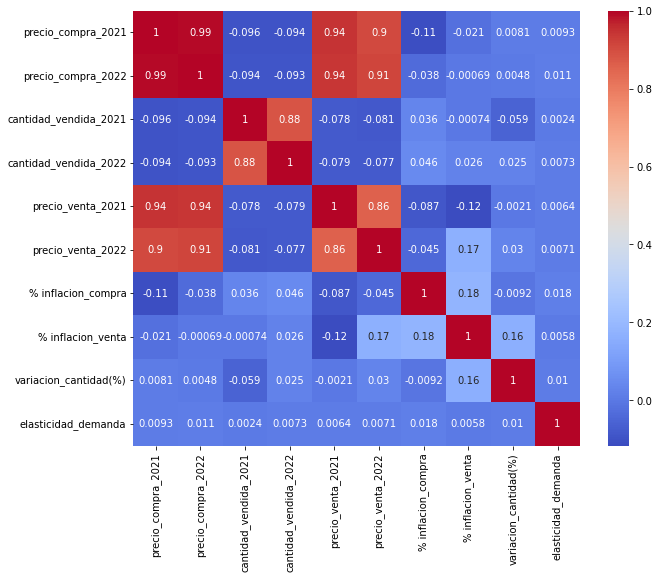

In [34]:
numeric_cols = Osa_inflation.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()
#corr_matrix = np.corrcoef(Osa_inflation.values.T)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [35]:
# se seleccionan las 600 referencias más vendidas en 2021
top_2021 = Osa_inflation.nlargest(600, 'cantidad_vendida_2021')

# se seleccionan las 600 referencias más vendidas en 2022
top_2022 = Osa_inflation.nlargest(600, 'cantidad_vendida_2022')

# unir los resultados
top_600 = top_2021.merge(top_2022, how='inner', on='Nombre_Prod')

# mostrar los resultados
top_600

,Nombre_Prod,precio_compra_2021_x,precio_compra_2022_x,cantidad_vendida_2021_x,cantidad_vendida_2022_x,precio_venta_2021_x,precio_venta_2022_x,% inflacion_compra_x,% inflacion_venta_x,variacion_cantidad(%)_x,...,precio_compra_2021_y,precio_compra_2022_y,cantidad_vendida_2021_y,cantidad_vendida_2022_y,precio_venta_2021_y,precio_venta_2022_y,% inflacion_compra_y,% inflacion_venta_y,variacion_cantidad(%)_y,elasticidad_demanda_y
0,Huevos El majadal 6 ud,1.683472,1.744861,5751.000,5006.000,2.200000,2.245833,3.646564,2.083333,-12.954269,...,1.683472,1.744861,5751.000,5006.000,2.200000,2.245833,3.646564,2.083333,-12.954269,-6.218049
1,Plátano,1.667236,2.311837,4208.736,5774.456,2.449426,3.349836,38.662824,36.760041,37.201668,...,1.667236,2.311837,4208.736,5774.456,2.449426,3.349836,38.662824,36.760041,37.201668,1.012014
2,Bolsa papel,0.025714,0.030000,3455.000,1609.000,0.050000,0.050000,16.666667,0.000000,-53.429812,...,0.025714,0.030000,3455.000,1609.000,0.050000,0.050000,16.666667,0.000000,-53.429812,-inf
3,Patata blanca,0.960758,1.079643,2830.864,3229.177,1.417716,1.582926,12.374150,11.653208,14.070369,...,0.960758,1.079643,2830.864,3229.177,1.417716,1.582926,12.374150,11.653208,14.070369,1.207424
4,Cerveza 4.8º Mahou clasica lata 33 cl,0.327917,0.384792,2423.000,3741.000,0.535292,0.618628,17.344346,15.568435,54.395378,...,0.327917,0.384792,2423.000,3741.000,0.535292,0.618628,17.344346,15.568435,54.395378,3.493953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Galleta espelta con chips de chocolate Biocop ...,0.400000,0.488571,92.000,99.000,0.650910,0.779464,22.142857,19.749866,7.608696,...,0.400000,0.488571,92.000,99.000,0.650910,0.779464,22.142857,19.749866,7.608696,0.385253
441,Kéfir up de cabra natural Cantero de letur 500 ml,2.220000,2.273182,92.000,127.000,3.050000,3.122727,2.395577,2.384501,38.043478,...,2.220000,2.273182,92.000,127.000,3.050000,3.122727,2.395577,2.384501,38.043478,15.954484
442,Salmón con miel y mostaza 2 raciones 350g aprox,6.550000,7.300472,92.000,129.000,9.000000,10.111250,11.457591,12.347222,40.217391,...,6.550000,7.300472,92.000,129.000,9.000000,10.111250,11.457591,12.347222,40.217391,3.257202
443,Tortitas cinco cereales Pasteco 100 gr,0.611667,0.720000,92.000,167.000,0.899306,1.050000,17.711172,16.756757,81.521739,...,0.611667,0.720000,92.000,167.000,0.899306,1.050000,17.711172,16.756757,81.521739,4.865007


In [36]:
top_600_2021 = top_2021[['Nombre_Prod']]
top_600_2021.head(8)

,Nombre_Prod
1334,Huevos El majadal 6 ud
2110,Plátano
403,Bolsa papel
1961,Patata blanca
598,Cerveza 4.8º Mahou clasica lata 33 cl
601,Cerveza 5.5º Mahou 5* lata 33 cl
1491,Leche ecologica semientera Ken 1 L
1490,Leche ecologica entera Ken 1 L


In [37]:
top_600_2022 = top_2022[['Nombre_Prod']]
top_600_2022.head(8)

,Nombre_Prod
2110,Plátano
1334,Huevos El majadal 6 ud
598,Cerveza 4.8º Mahou clasica lata 33 cl
1961,Patata blanca
1507,Leche uht semidesnatada Quien es el jefe 1 L
2789,Zanahoria
1505,Leche uht entera Quien es el jefe 1 L
601,Cerveza 5.5º Mahou 5* lata 33 cl


In [38]:
prod_comunes_600 = top_600_2021.merge(top_600_2022, how= 'inner', left_on= 'Nombre_Prod', right_on='Nombre_Prod')
prod_comunes_600.head(8)

,Nombre_Prod
0,Huevos El majadal 6 ud
1,Plátano
2,Bolsa papel
3,Patata blanca
4,Cerveza 4.8º Mahou clasica lata 33 cl
5,Cerveza 5.5º Mahou 5* lata 33 cl
6,Leche ecologica semientera Ken 1 L
7,Leche ecologica entera Ken 1 L


In [39]:
# Eliminamos valores Nulos
top_600 = top_600.dropna()
top_600.head(5)

,Nombre_Prod,precio_compra_2021_x,precio_compra_2022_x,cantidad_vendida_2021_x,cantidad_vendida_2022_x,precio_venta_2021_x,precio_venta_2022_x,% inflacion_compra_x,% inflacion_venta_x,variacion_cantidad(%)_x,...,precio_compra_2021_y,precio_compra_2022_y,cantidad_vendida_2021_y,cantidad_vendida_2022_y,precio_venta_2021_y,precio_venta_2022_y,% inflacion_compra_y,% inflacion_venta_y,variacion_cantidad(%)_y,elasticidad_demanda_y
0,Huevos El majadal 6 ud,1.683472,1.744861,5751.000,5006.000,2.200000,2.245833,3.646564,2.083333,-12.954269,...,1.683472,1.744861,5751.000,5006.000,2.200000,2.245833,3.646564,2.083333,-12.954269,-6.218049
1,Plátano,1.667236,2.311837,4208.736,5774.456,2.449426,3.349836,38.662824,36.760041,37.201668,...,1.667236,2.311837,4208.736,5774.456,2.449426,3.349836,38.662824,36.760041,37.201668,1.012014
2,Bolsa papel,0.025714,0.030000,3455.000,1609.000,0.050000,0.050000,16.666667,0.000000,-53.429812,...,0.025714,0.030000,3455.000,1609.000,0.050000,0.050000,16.666667,0.000000,-53.429812,-inf
3,Patata blanca,0.960758,1.079643,2830.864,3229.177,1.417716,1.582926,12.374150,11.653208,14.070369,...,0.960758,1.079643,2830.864,3229.177,1.417716,1.582926,12.374150,11.653208,14.070369,1.207424
4,Cerveza 4.8º Mahou clasica lata 33 cl,0.327917,0.384792,2423.000,3741.000,0.535292,0.618628,17.344346,15.568435,54.395378,...,0.327917,0.384792,2423.000,3741.000,0.535292,0.618628,17.344346,15.568435,54.395378,3.493953


In [40]:
top_600.isnull().sum(axis= 1)

0      0
1      0
2      0
3      0
4      0
      ..
440    0
441    0
442    0
443    0
444    0
Length: 445, dtype: int64

In [41]:

#Osa_inflation.style.format({'inflacion_compra': '{:.2%}'})

#Osa_inflation = Osa_inflation.style.format({'inflacion_venta': '{:.2%}'})

### VISUALIZACION

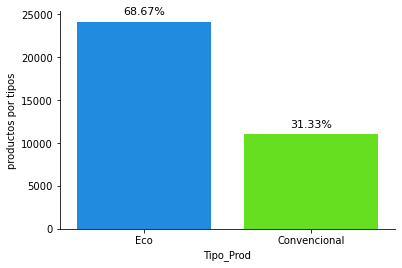

In [42]:
import seaborn as sns

ax = sns.countplot(x="Tipo_Prod",data=Osa_df, palette="gist_rainbow_r")
plt.ylabel("productos por tipos")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/Osa_df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

### se Observa que el mayor porcentaje de productos distribuidos por el Supermercado la Osa son Ecologicos con un 68,67 % sobre un 31;33% de producto convencional

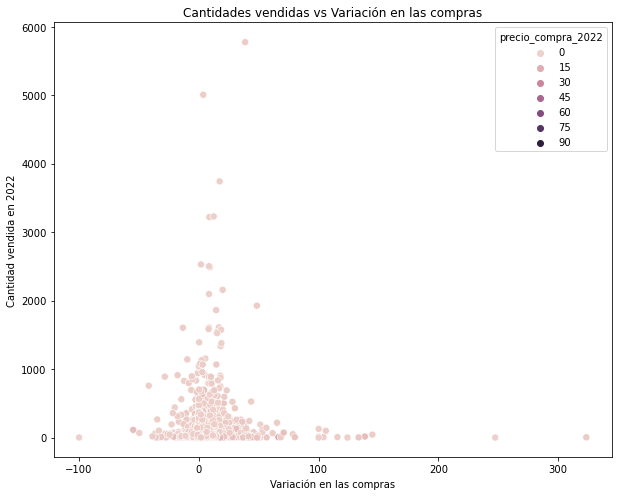

In [43]:
# grafico de la variación en las cantidades vendidas de acuerdo al porcentaje de inflación en las compras
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Osa_inflation , x='% inflacion_compra', y='cantidad_vendida_2022', hue='precio_compra_2022', s=50)

# Agregar títulos y etiquetas a los ejes
plt.title('Cantidades vendidas vs Variación en las compras')
plt.xlabel('Variación en las compras')
plt.ylabel('Cantidad vendida en 2022')
plt.show()

In [44]:
Osa_inflation.columns.values

array(['Nombre_Prod', 'precio_compra_2021', 'precio_compra_2022',
       'cantidad_vendida_2021', 'cantidad_vendida_2022',
       'precio_venta_2021', 'precio_venta_2022', '% inflacion_compra',
       '% inflacion_venta', 'variacion_cantidad(%)',
       'elasticidad_demanda'], dtype=object)

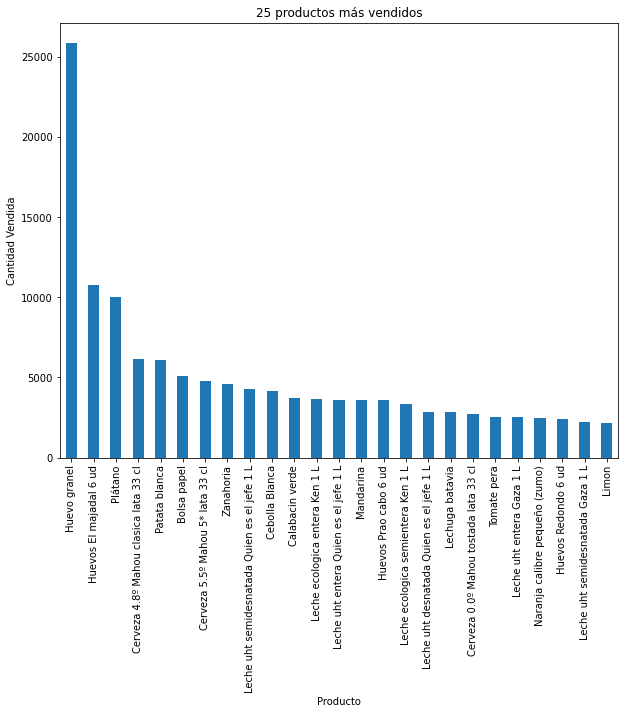

In [47]:
plt.figure(figsize=(10, 8))
ventas_por_producto = Osa_df.groupby(['Nombre_Prod'])['Cant_Prod_Venta'].sum()
ventas_por_producto = ventas_por_producto.sort_values(ascending=False)
productos_mas_vendidos = ventas_por_producto.head(25)

productos_mas_vendidos.plot(kind='bar')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.title('25 productos más vendidos')
plt.show()

In [48]:
productos_mas_vendidos

Nombre_Prod
Huevo granel                                    25833.000
Huevos El majadal 6 ud                          10757.000
Plátano                                          9983.192
Cerveza 4.8º Mahou clasica lata 33 cl            6164.000
Patata blanca                                    6060.041
Bolsa papel                                      5064.000
Cerveza 5.5º Mahou 5* lata 33 cl                 4772.000
Zanahoria                                        4599.091
Leche uht semidesnatada Quien es el jefe 1 L     4283.000
Cebolla Blanca                                   4147.903
Calabacin verde                                  3741.488
Leche ecologica entera Ken 1 L                   3643.000
Leche uht entera Quien es el jefe 1 L            3616.000
Mandarina                                        3598.068
Huevos Prao cabo 6 ud                            3562.000
Leche ecologica semientera Ken 1 L               3323.000
Leche uht desnatada Quien es el jefe 1 L         2868.750
Le

### porcentaje sobre las ventas totales de los 10 productos más vendido

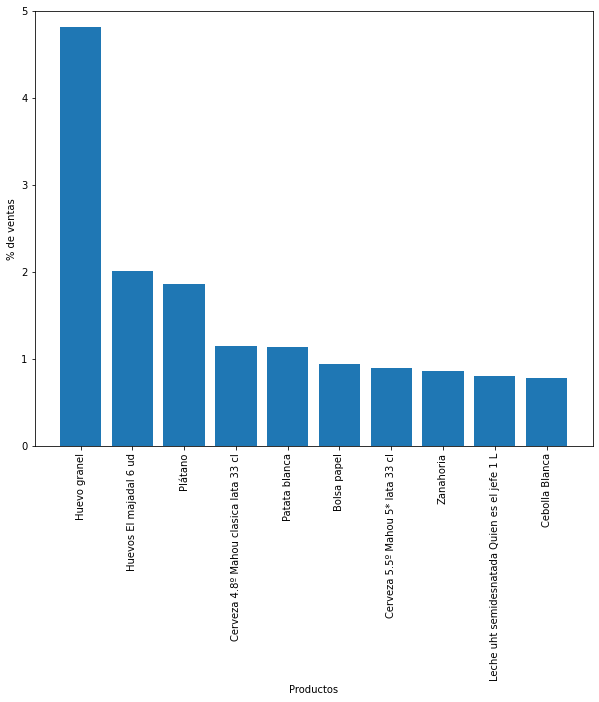

In [55]:
plt.figure(figsize=(10, 8))
# Calcular las ventas totales de cada producto
sales_by_product = Osa_df.groupby('Nombre_Prod')['Cant_Prod_Venta'].sum().sort_values(ascending=False)

# Seleccionar los 10 productos más vendidos
top_10_products = sales_by_product.head(10)

# Calcular el porcentaje sobre las ventas totales de los 10 productos más vendidos
sales_percentages = top_10_products / sales_by_product.sum() * 100

# Crear el gráfico de barras con el porcentaje de ventas
plt.bar(sales_percentages.index, sales_percentages.values)

# Ajustar los límites del eje y y agregar etiquetas
plt.ylim([0, 5])
plt.ylabel('% de ventas')
plt.xlabel('Productos')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

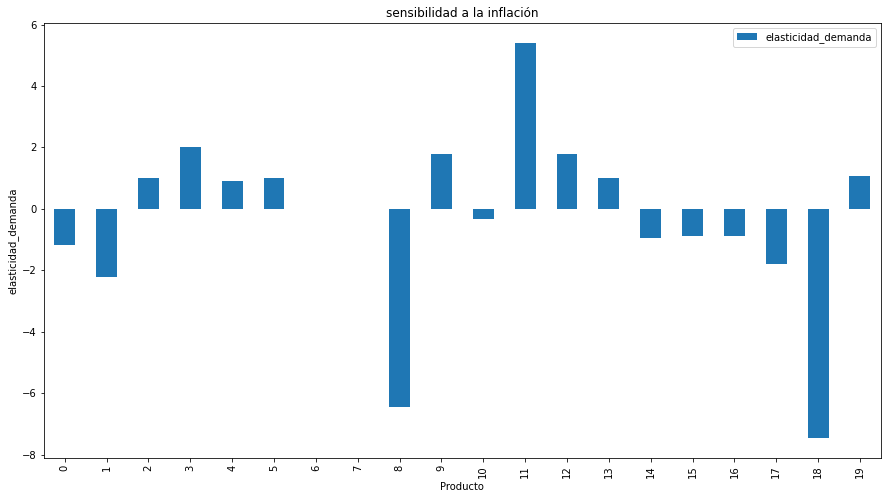

In [56]:

sensibilidad_demanda = Osa_inflation[['Nombre_Prod','elasticidad_demanda']]
sensi_demanda = sensibilidad_demanda.head(20)
#plt.figure(figsize=(15, 8))
sensi_demanda.plot(kind='bar', figsize=(15, 8))

plt.xlabel('Producto')
plt.ylabel('elasticidad_demanda')
plt.title('sensibilidad a la inflación')
plt.show()

### Visualización por categoría general y primera subcategoría de productos

In [57]:
#### VAMOS A UTILIZAR EL DATAFRAME df_catego_subcatego PARA ANALIZAR POR CATEGORIAS Y SUBCATEGORÍAS
df_catego_subcatego

,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta,Categoria_Principal
0,9,2021,1,5.43,2021-01,Aceite coco Maya gold 450 ml,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1,Seco
1,13,2021,1,2.91,2021-01,Aceite de girasol Virgen bio Franciscanos 1 L,Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1,Seco
2,18,2021,1,12.94,2021-01,Aceite oliva virgen extra Umbria Oretana 2.5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",9.000,18.50,2021,1,Seco
3,20,2021,1,22.95,2021-01,Aceite oliva virgen extra Umbria oretana 5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",5.000,32.75,2021,1,Seco
4,23,2021,1,15.58,2021-01,Aceite rosa mosqueta y damáscena Piel sana 50 ml,Eco,(PIELSANA) PIELSANA S.COOP.MAD.,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1.000,26.20,2021,1,"Droguería,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35152,6502,2022,12,11.01,2022-12,Pularda deshuesada Sanchonar aprox 3 kg,Convencional,(SANCHONAR) SANCHONAR S.L.,Resto Producto Fresco / Carnes frescas / Aves,7.095,15.10,2022,12,Resto
35153,6508,2022,12,13.96,2022-12,Pack Veer 8 botellas 33cl,Eco,(VEER) MISSON S.COOP.CYL.,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",1.000,21.95,2022,12,Seco
35154,6511,2022,12,2.23,2022-12,Láminas lasagña de sémola Castagno 500 g,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Arroces, pastas, sémolas y leg...",2.000,3.35,2022,12,Seco
35155,6515,2022,12,2.06,2022-12,Yogur de avena natural Alpro 500 gr,Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.","Resto Producto Fresco / Leche, zumos, producto...",1.000,2.85,2022,12,Resto


In [58]:
# dividir la columna 'Categoria_Prod' en tres subcategorías: Categoria_general, Subcategoria_1 Y Subcategoria_2
df_catego_subcatego[['Categoria_general', 'Subcategoria_1', 'Subcategoria_2']] = df_catego_subcatego['Categoria_Prod'].str.split(' / ', expand=True)

In [59]:
df_catego_subcatego 

,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta,Categoria_Principal,Categoria_general,Subcategoria_1,Subcategoria_2
0,9,2021,1,5.43,2021-01,Aceite coco Maya gold 450 ml,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
1,13,2021,1,2.91,2021-01,Aceite de girasol Virgen bio Franciscanos 1 L,Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.00,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
2,18,2021,1,12.94,2021-01,Aceite oliva virgen extra Umbria Oretana 2.5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",9.000,18.50,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
3,20,2021,1,22.95,2021-01,Aceite oliva virgen extra Umbria oretana 5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",5.000,32.75,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
4,23,2021,1,15.58,2021-01,Aceite rosa mosqueta y damáscena Piel sana 50 ml,Eco,(PIELSANA) PIELSANA S.COOP.MAD.,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1.000,26.20,2021,1,"Droguería,","Droguería, Perfumería, Limpieza, Higiene, Hogar",Parafarmacia y cosmética,Cuidado de la piel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35152,6502,2022,12,11.01,2022-12,Pularda deshuesada Sanchonar aprox 3 kg,Convencional,(SANCHONAR) SANCHONAR S.L.,Resto Producto Fresco / Carnes frescas / Aves,7.095,15.10,2022,12,Resto,Resto Producto Fresco,Carnes frescas,Aves
35153,6508,2022,12,13.96,2022-12,Pack Veer 8 botellas 33cl,Eco,(VEER) MISSON S.COOP.CYL.,"Seco Envasado / Vinos, cervezas, sidras / Cerv...",1.000,21.95,2022,12,Seco,Seco Envasado,"Vinos, cervezas, sidras",Cervezas
35154,6511,2022,12,2.23,2022-12,Láminas lasagña de sémola Castagno 500 g,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Arroces, pastas, sémolas y leg...",2.000,3.35,2022,12,Seco,Seco Envasado,"Arroces, pastas, sémolas y legumbres",Pastas y sémolas
35155,6515,2022,12,2.06,2022-12,Yogur de avena natural Alpro 500 gr,Convencional,"(GM FOOD) TRANSGOURMET IBERICA, S.A.U.","Resto Producto Fresco / Leche, zumos, producto...",1.000,2.85,2022,12,Resto,Resto Producto Fresco,"Leche, zumos, productos lácteos",Yogur y postre vegetal


In [60]:
cantidad_categorias_generales = df_catego_subcatego['Categoria_general'].nunique()
cantidad_subcategorias_1 = df_catego_subcatego['Subcategoria_1'].nunique()
cantidad_subcategorias_2 = df_catego_subcatego['Subcategoria_2'].nunique()

In [61]:
cantidad_categorias_generales

6

In [62]:
cantidad_subcategorias_1

46

In [63]:
cantidad_subcategorias_2

106

In [64]:
# Conclusión:
# -  Al estructurar el dataframe en Categoría_general, Subcategoría_1 y Subcategoría_2, se tiene una frecuencia de valores únicos:
#    Cantidad de categorias generales = 6
#    Cantidad de subcategorias 1 = 46
#    Cantidad de subcategorias 2 = 106
# - Esta reestructuración permitirá tener un mapeo resumido de la frecuencia de compras e ventas.

In [65]:
df_catego_subcatego['Categoria_general'].value_counts()

Seco Envasado                                      18300
Resto Producto Fresco                               9408
Droguería, Perfumería, Limpieza, Higiene, Hogar     3532
Fruta y Verdura                                     3132
Granel                                               717
Librería                                              68
Name: Categoria_general, dtype: int64

In [66]:
df_catego_subcatego['Subcategoria_1'].value_counts()

Leche, zumos, productos lácteos                            2977
Desayunos y merienda                                       2048
Zumos, leche y bebidas vegetales                           1703
Dulces y repostería                                        1674
Caldo, cremas, plato preparado, conserva                   1604
Encurtidos y aperitivos                                    1595
Quesos                                                     1561
Verdura                                                    1556
Higiene                                                    1382
Arroces, pastas, sémolas y legumbres                       1357
Vinos, cervezas, sidras                                    1332
Panes, harinas                                             1325
Aceites, aliños y condimentos                              1270
Conserva vegetal                                           1212
Carnes frescas                                             1112
Droguería                               

In [67]:
df_catego_subcatego['Subcategoria_2'].value_counts()

Yogures y postres             2108
Verdura de cocinar            1256
Conserva vegetal              1212
Otros                         1191
Panes industriales            1080
                              ... 
Preparaciones medicinales        6
Insecticidas                     5
Higiene – Higiene corporal       4
Infusiones                       3
Otras frutas                     2
Name: Subcategoria_2, Length: 106, dtype: int64

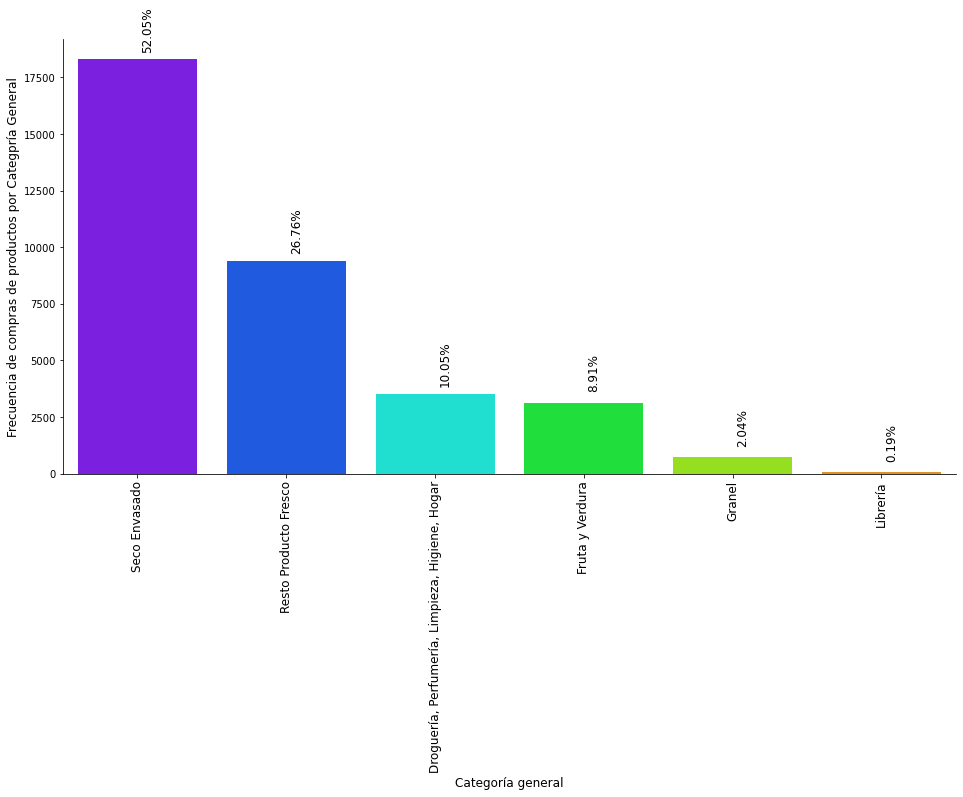

In [68]:
# Obtener la frecuencia de compra en base a la Categpría general y ordenarlo en forma descendente

counts = df_catego_subcatego['Categoria_general'].value_counts(ascending=False)
ordered_categories = counts.index.tolist()

# Graficamos la frecuencia de compra en función a Categoria_general del dataframe df_catego_subcatego
plt.figure(figsize=(16, 8)) # especificamos un tamaño de 12 pulgadas de ancho por 6 de alto
ax = sns.countplot(x="Categoria_general", data=df_catego_subcatego, palette="gist_rainbow_r",  order=ordered_categories )
plt.ylabel("Frecuencia de compras de productos por Categpría General",  fontsize=12) # reducimos el tamaño de fuente de la etiqueta del eje Y
plt.xlabel("Categoría general",  fontsize=12) 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df_catego_subcatego.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=12,color="black",rotation=90,xytext=(10,30),textcoords = "offset points") # reducimos el tamaño de fuente de la anotación del porcentaje
plt.show()

In [69]:

# Conclusión.
# - La categoría con mayor frecuencia de compra es el Seco Envasado, representa un 52.05%, y la categoría con menor frecuencia de compra son los productos de Librería, con un 0.19 %.

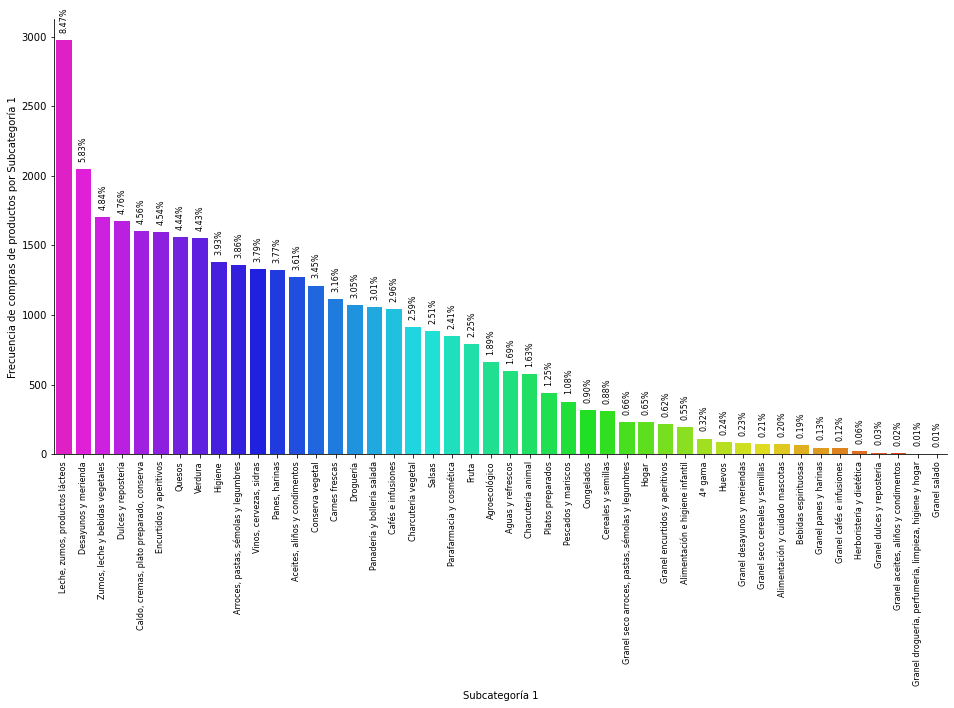

In [70]:
# Obtener la frecuencia de compra en base a la Subcategpría 1 y ordenarlo en forma descendente

counts = df_catego_subcatego['Subcategoria_1'].value_counts(ascending=False)
ordered_categories = counts.index.tolist()

# Graficamos la frecuencia de compra en función a Subcategoria_2 del dataframe df_catego_subcatego
plt.figure(figsize=(16, 8)) # especificamos un tamaño de 12 pulgadas de ancho por 6 de alto
ax = sns.countplot(x="Subcategoria_1", data=df_catego_subcatego, palette="gist_rainbow_r",  order=ordered_categories )
plt.ylabel("Frecuencia de compras de productos por Subcategoría 1",  fontsize=10) # reducimos el tamaño de fuente de la etiqueta del eje Y
plt.xlabel("Subcategoría 1",  fontsize=10) 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df_catego_subcatego.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=8,color="black",rotation=90,xytext=(0,20),textcoords = "offset points") # reducimos el tamaño de fuente de la anotación del porcentaje
plt.show()

In [71]:
# Conclusión.
# - La Subcategpría 1 con mayor frecuencia de compra es la "Leche, zumos, productos lácteso", representa un 8.47 %, y la categoría con menor frecuencia de compra son los productos a Granel salado, con un 0.01 %.

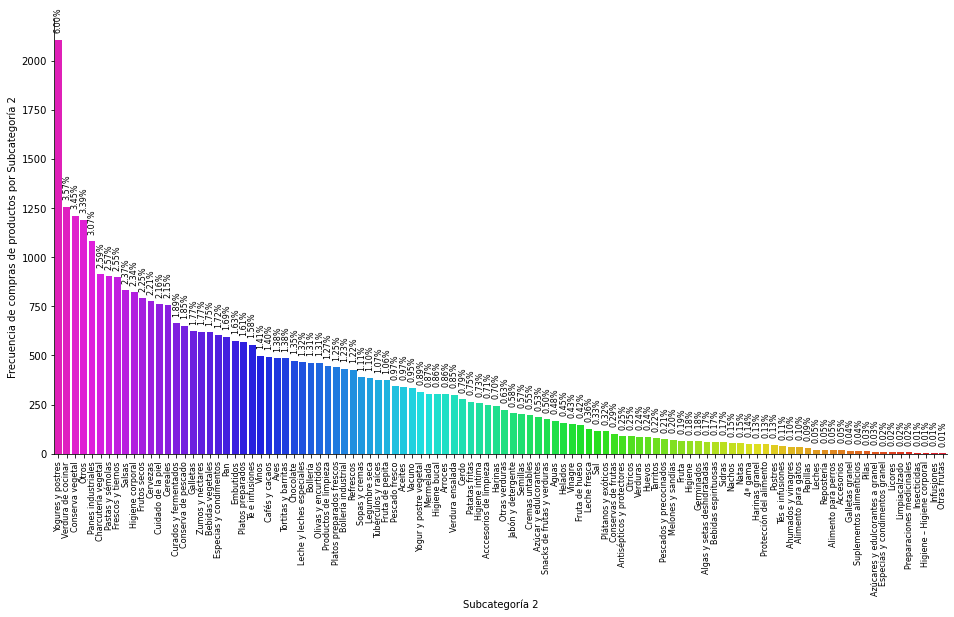

In [72]:
# Obtener la frecuencia de compra en base a la Subcategpría 2 y ordenarlo en forma descendente

counts = df_catego_subcatego['Subcategoria_2'].value_counts(ascending=False)
ordered_categories = counts.index.tolist()

# Graficamos la frecuencia de compra en función a Subcategoria_2 del dataframe df_catego_subcatego
plt.figure(figsize=(16, 8)) # especificamos un tamaño de 12 pulgadas de ancho por 6 de alto
ax = sns.countplot(x="Subcategoria_2", data=df_catego_subcatego, palette="gist_rainbow_r",  order=ordered_categories )
plt.ylabel("Frecuencia de compras de productos por Subcategoría 2",  fontsize=10) # reducimos el tamaño de fuente de la etiqueta del eje Y
plt.xlabel("Subcategoría 2",  fontsize=10) 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df_catego_subcatego.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=8,color="black",rotation=90,xytext=(0,20),textcoords = "offset points") # reducimos el tamaño de fuente de la anotación del porcentaje
plt.show()

In [73]:
# Conclusión.
# - La Subcategpría 2 con mayor frecuencia de compra son los "Yogures y postres", representa un 6.00 %, y la categoría con menor frecuencia de compra corresponde a la tipología Otras frutas, con un 0.01 %.

In [74]:
# Comparación de flujo de ventas para 2021 y 2022 en base a la Categoría general

Variacion_Venta_Cate_General = Osa_df.pivot_table(index='Categoria_general',columns= str('Año_Venta'),values='Precio_Prod', aggfunc='mean')
Variacion_Venta_Cate_General

Año_Venta,2021,2022
Categoria_general,,
"Droguería, Perfumería, Limpieza, Higiene, Hogar",5.059075,5.484205
Fruta y Verdura,3.010337,3.191545
Granel,12.300939,12.106457
Librería,5.750000,7.135833
Resto Producto Fresco,4.684239,4.967924
Seco Envasado,2.912605,3.103749


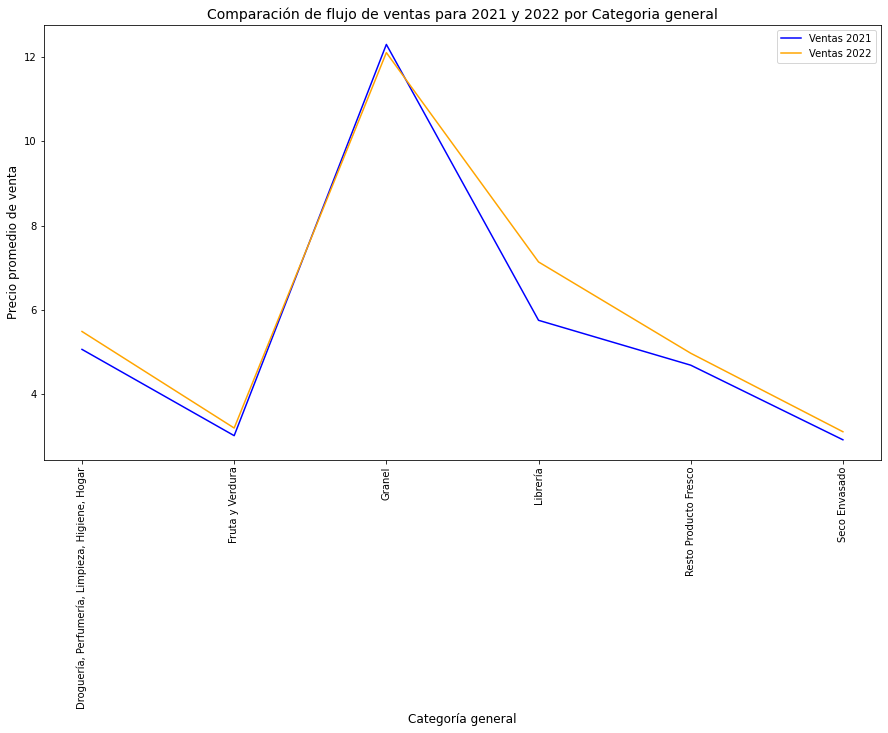

In [75]:
# Grágico: Comparación de flujo de ventas para 2021 y 2022 en base a la Categoría general

# Pivotea los datos
Variacion_Venta_Cate_General = Osa_df.pivot_table(index='Categoria_general', columns=str('Año_Venta'), values='Precio_Prod', aggfunc='mean')

# Selecciona solo los datos de 2021 y 2022
ventas_2021 = Variacion_Venta_Cate_General[2021]
ventas_2022 = Variacion_Venta_Cate_General[2022]

# Ajusta el tamaño de la figura
fig, ax = plt.subplots(figsize=(15, 8))

# Crea el gráfico de líneas
ax.plot(ventas_2021.index, ventas_2021.values, color='blue', label='Ventas 2021')
ax.plot(ventas_2022.index, ventas_2022.values, color='orange', label='Ventas 2022')

# Ajusta los rótulos del eje x
ax.set_xticklabels(ventas_2021.index, rotation=90)

# Agrega leyendas y títulos
plt.legend()
plt.title('Comparación de flujo de ventas para 2021 y 2022 por Categoria general' ,  fontsize=14)
plt.xlabel('Categoría general',  fontsize=12)
plt.ylabel('Precio promedio de venta' ,  fontsize=12)

# Muestra el gráfico
plt.show()

In [76]:
# Conclusión.
# La categoría general Librería es la que presenta una mayor variación de las ventas entre los años 2021 y 2022, reflejando un incremento en el año 2022.
# En general, las ventas del año 2022 se ven incrementadas en todas las categprías, sobre todo en: "Droguería, Perfumería, Limpieza, Higiene, Hogar", "Fruta y Verdura" , "Librería", "Resto Producto Fresco" y "Seco Envasado".


In [77]:
# Comparación de flujo de ventas para 2021 y 2022 por subcategoría 1
Variacion_Venta_SubCatego1 = Osa_df.pivot_table(index='Subcategoria_1',columns= str('Año_Venta'),values='Precio_Prod', aggfunc='mean')
Variacion_Venta_SubCatego1


Año_Venta,2021,2022
Subcategoria_1,,
4ª gama,2.159396,1.951716
"Aceites, aliños y condimentos",4.348875,5.211501
Agroecológico,2.531494,2.604854
Aguas y refrescos,1.315912,1.375425
Alimentación e higiene infantil,3.437222,3.638178
Alimentación y cuidado mascotas,1.149524,1.992517
"Arroces, pastas, sémolas y legumbres",2.372819,2.545771
Bebidas espirituosas,6.815306,8.270588
Cafés e infusiones,3.634164,3.674214


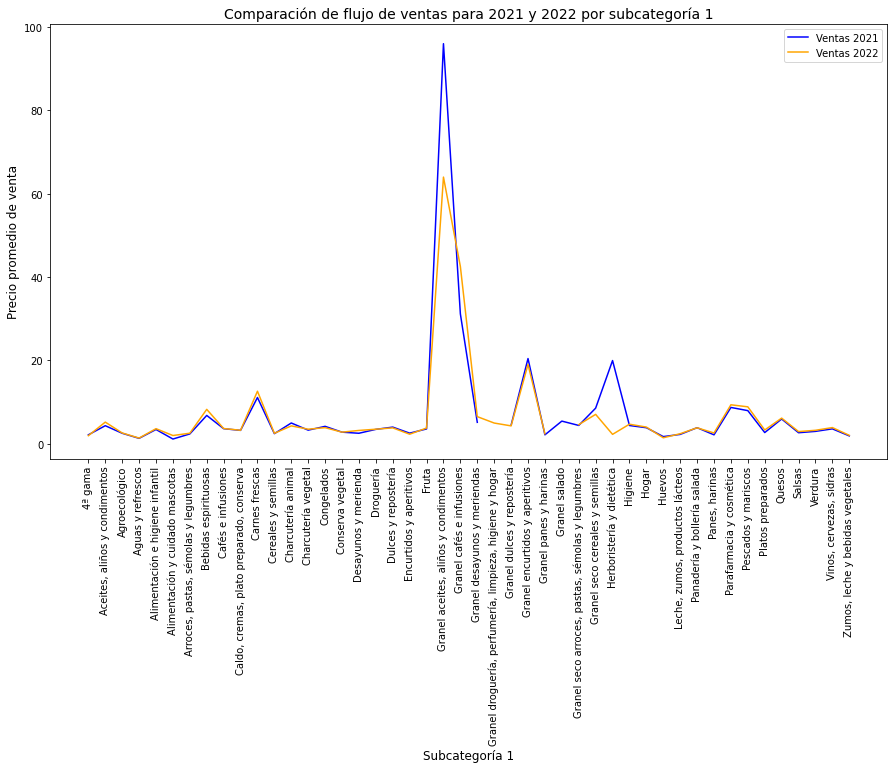

In [78]:


# Gráfica: Comparación de flujo de ventas para 2021 y 2022 por subcategoría 1

# Pivotea los datos
Variacion_Venta_SubCatego1 = Osa_df.pivot_table(index='Subcategoria_1', columns=str('Año_Venta'), values='Precio_Prod', aggfunc='mean')

# Selecciona solo los datos de 2021 y 2022
ventas_2021 = Variacion_Venta_SubCatego1[2021]
ventas_2022 = Variacion_Venta_SubCatego1[2022]

# Ajusta el tamaño de la figura
fig, ax = plt.subplots(figsize=(15, 8))

# Crea el gráfico de líneas
ax.plot(ventas_2021.index, ventas_2021.values, color='blue', label='Ventas 2021')
ax.plot(ventas_2022.index, ventas_2022.values, color='orange', label='Ventas 2022')

# Ajusta los rótulos del eje x
ax.set_xticklabels(ventas_2021.index, rotation=90)

# Agrega leyendas y títulos
plt.legend()
plt.title('Comparación de flujo de ventas para 2021 y 2022 por subcategoría 1',  fontsize=14)
plt.xlabel('Subcategoría 1',  fontsize=12)
plt.ylabel('Precio promedio de venta',  fontsize=12)

# Muestra el gráfico
plt.show()



In [79]:
Osa_df.columns.values

array(['Id_Prod_2', 'Año_Compra', 'Mes_Compra', 'Costo_Compra', 'Fecha',
       'Nombre_Prod', 'Tipo_Prod', 'Proveedor', 'Categoria_Prod',
       'Cant_Prod_Venta', 'Precio_Prod', 'Año_Venta', 'Mes_Venta',
       'Categoria_Principal', 'Categoria_general', 'Subcategoria_1',
       'Subcategoria_2'], dtype=object)

In [80]:
Osa_df['Fecha'] = pd.to_datetime(Osa_df['Fecha'])
Osa_df['Fecha'] = pd.to_datetime(Osa_df['Fecha'].dt.strftime('%Y-%m'))
Osa_df.head()


,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta,Categoria_Principal,Categoria_general,Subcategoria_1,Subcategoria_2
0,9,2021,1,5.43,2021-01-01,Aceite coco Maya gold 450 ml,Eco,(GUMENDI) GUMIEL Y MENDIA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",0.0,0.00,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
1,13,2021,1,2.91,2021-01-01,Aceite de girasol Virgen bio Franciscanos 1 L,Eco,(PIDEBIO) PLATAFORMA IBERICA DISTRIBUCION ECOL...,"Seco Envasado / Aceites, aliños y condimentos ...",0.0,0.00,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
2,18,2021,1,12.94,2021-01-01,Aceite oliva virgen extra Umbria Oretana 2.5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",9.0,18.50,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
3,20,2021,1,22.95,2021-01-01,Aceite oliva virgen extra Umbria oretana 5 L,Eco,(LA LABRANZA TOLEDANA) LA LABRANZA TOLEDANA S.L.,"Seco Envasado / Aceites, aliños y condimentos ...",5.0,32.75,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
4,23,2021,1,15.58,2021-01-01,Aceite rosa mosqueta y damáscena Piel sana 50 ml,Eco,(PIELSANA) PIELSANA S.COOP.MAD.,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1.0,26.20,2021,1,"Droguería,","Droguería, Perfumería, Limpieza, Higiene, Hogar",Parafarmacia y cosmética,Cuidado de la piel


In [81]:
# Extraer el texto entre paréntesis en la columna Proveedor y guardarla en una nueva columna
Osa_df['Proveedor'] = Osa_df['Proveedor'].str.extract(r'\((.*?)\)')

# Mostrar el DataFrame con la nueva columna
Osa_df.head(10)

,Id_Prod_2,Año_Compra,Mes_Compra,Costo_Compra,Fecha,Nombre_Prod,Tipo_Prod,Proveedor,Categoria_Prod,Cant_Prod_Venta,Precio_Prod,Año_Venta,Mes_Venta,Categoria_Principal,Categoria_general,Subcategoria_1,Subcategoria_2
0,9,2021,1,5.430000,2021-01-01,Aceite coco Maya gold 450 ml,Eco,GUMENDI,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.000000,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
1,13,2021,1,2.910000,2021-01-01,Aceite de girasol Virgen bio Franciscanos 1 L,Eco,PIDEBIO,"Seco Envasado / Aceites, aliños y condimentos ...",0.000,0.000000,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
2,18,2021,1,12.940000,2021-01-01,Aceite oliva virgen extra Umbria Oretana 2.5 L,Eco,LA LABRANZA TOLEDANA,"Seco Envasado / Aceites, aliños y condimentos ...",9.000,18.500000,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
3,20,2021,1,22.950000,2021-01-01,Aceite oliva virgen extra Umbria oretana 5 L,Eco,LA LABRANZA TOLEDANA,"Seco Envasado / Aceites, aliños y condimentos ...",5.000,32.750000,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
4,23,2021,1,15.580000,2021-01-01,Aceite rosa mosqueta y damáscena Piel sana 50 ml,Eco,PIELSANA,"Droguería, Perfumería, Limpieza, Higiene, Hoga...",1.000,26.200000,2021,1,"Droguería,","Droguería, Perfumería, Limpieza, Higiene, Hogar",Parafarmacia y cosmética,Cuidado de la piel
5,24,2021,1,7.030000,2021-01-01,Aceite sésamo Biocop 750 ml,Eco,BIOCOP,"Seco Envasado / Aceites, aliños y condimentos ...",3.000,9.500000,2021,1,Seco,Seco Envasado,"Aceites, aliños y condimentos",Aceites
6,26,2021,1,1.230000,2021-01-01,Aceituna manzanilla con especias Campomar natu...,Eco,GUMENDI,Seco Envasado / Encurtidos y aperitivos / Oliv...,10.000,1.750000,2021,1,Seco,Seco Envasado,Encurtidos y aperitivos,Olivas y encurtidos
7,31,2021,1,1.421111,2021-01-01,Acelga Verde,Eco,EUROBANAN,Fruta y Verdura / Verdura / Verdura de cocinar,83.397,2.167083,2021,1,Fruta,Fruta y Verdura,Verdura,Verdura de cocinar
8,34,2021,1,2.560000,2021-01-01,Achicoria soluble Biocop 100 g,Eco,BIOCOP,Seco Envasado / Cafés e infusiones / Cafés y c...,4.000,3.650000,2021,1,Seco,Seco Envasado,Cafés e infusiones,Cafés y cacaos
9,38,2021,1,3.956000,2021-01-01,Aguacate Hass,Eco,PIDEBIO,Fruta y Verdura / Fruta / Fruta de hueso,59.117,6.320213,2021,1,Fruta,Fruta y Verdura,Fruta,Fruta de hueso


In [82]:
top_5_productos = Osa_df.groupby('Nombre_Prod').sum().sort_values(by='Cant_Prod_Venta', ascending=False).head(5).index

df_top_5 = Osa_df[Osa_df['Nombre_Prod'].isin(top_5_productos)]

precios_promedio = df_top_5.groupby(['Nombre_Prod', pd.Grouper(key='Fecha', freq='M')])['Precio_Prod'].mean().unstack('Nombre_Prod')


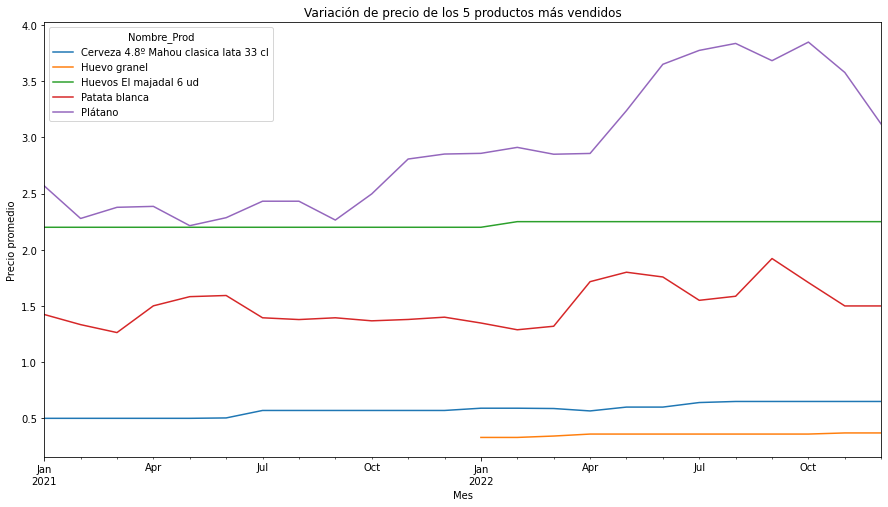

In [83]:
precios_promedio.plot(figsize=(15, 8))
plt.title('Variación de precio de los 5 productos más vendidos')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.show()

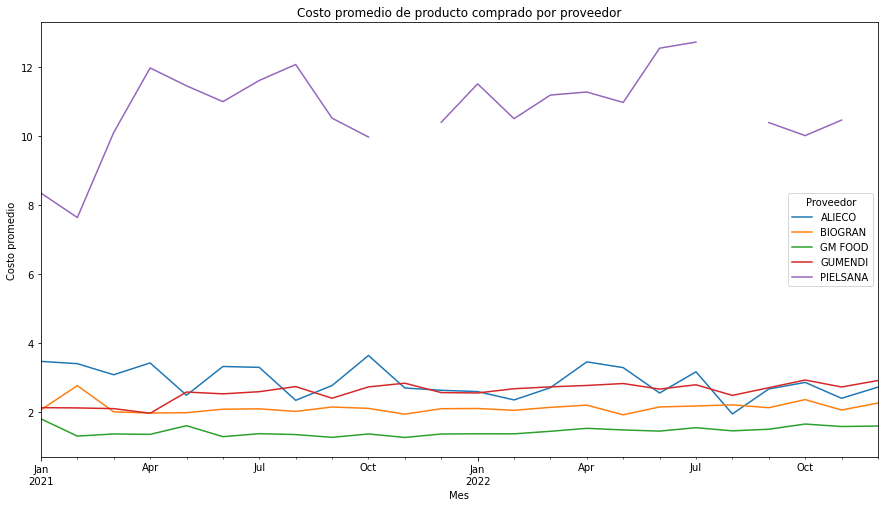

In [84]:
compras_por_proveedor = Osa_df.groupby('Proveedor')['Costo_Compra'].sum().reset_index()

top_5_proveedores = compras_por_proveedor.sort_values(by='Costo_Compra', ascending=False).head(5)['Proveedor']

df_top_5 = Osa_df[Osa_df['Proveedor'].isin(top_5_proveedores)]


cantidad_promedio_por_proveedor = df_top_5.groupby(['Proveedor', pd.Grouper(key='Fecha', freq='M')])['Costo_Compra'].mean().unstack('Proveedor')


cantidad_promedio_por_proveedor.plot(figsize=(15, 8))
plt.title('Costo promedio de producto comprado por proveedor')
plt.xlabel('Mes')
plt.ylabel('Costo promedio')
plt.show()


In [85]:
cantidad_promedio_por_proveedor

Proveedor,ALIECO,BIOGRAN,GM FOOD,GUMENDI,PIELSANA
Fecha,,,,,
2021-01-31,3.466818,2.061374,1.797468,2.123445,8.353333
2021-02-28,3.400318,2.761731,1.297779,2.115669,7.642500
2021-03-31,3.078579,2.002186,1.359264,2.095022,10.113333
2021-04-30,3.421574,1.967740,1.347980,1.961237,11.986875
2021-05-31,2.485102,1.977102,1.599704,2.577286,11.467778
2021-06-30,3.318617,2.078142,1.280889,2.524278,11.008235
2021-07-31,3.293067,2.089325,1.368051,2.586561,11.623600
2021-08-31,2.336250,2.014340,1.342027,2.735254,12.086667
2021-09-30,2.766295,2.142681,1.261406,2.397227,10.528519


In [86]:
#Se agrupa los productos por proveedor y cuenta el número de productos
productos_por_proveedor = Osa_df.groupby('Proveedor')['Nombre_Prod'].count()

#se crea un nuevo dataframe con la información agrupada
df_agrupado = pd.DataFrame({'Proveedor': productos_por_proveedor.index, 'Nombre_Prod': productos_por_proveedor.values})

#se imprime el nuevo dataframe
print(df_agrupado)

                          Proveedor  Nombre_Prod
0                      3 LETRAS PAN           87
1                    ACEITE ECOPIPA           14
2                 ACEITES VIZCÁNTAR          113
3              AGUACATES ECOLOGICOS            9
4                            ALIECO         1374
..                              ...          ...
116  VERMUT ZARRO Y SANGRÍA LOLAILO           88
117            XOCOLATES TONI GARSI           31
118                           ZALLO           79
119                         ZUAITZO          313
120   antigua LA FINESTRA SUL CIELO          180

[121 rows x 2 columns]


In [87]:
# Agrupa los datos por proveedor y producto, y suma la cantidad vendida
datos_agrupados = Osa_df.groupby(['Proveedor', 'Nombre_Prod'])['Cant_Prod_Venta'].sum()

datos_agrupados

Proveedor                      Nombre_Prod                                                 
3 LETRAS PAN                   Barra trigo 3 Letras Pan 330 gr                                   3.0
                               Bollo de azahar                                                  68.0
                               Bollo de chocolate                                               77.0
                               Chapata 3 Letras Pan 350 gr                                     553.0
                               Croissant 3 Letras Pan 70 gr                                      2.0
                                                                                               ...  
antigua LA FINESTRA SUL CIELO  Semillas de calabaza peladas bio La finestra sul cielo 250 g     84.0
                               Shiro miso La finestra sul cielo 250 g                            8.0
                               Tiramisú Vivibio 80 g                                            12.0

In [88]:
# Ordena los datos por cantidad vendida de mayor a menor
datos_ordenados = datos_agrupados.sort_values(ascending=False)

datos_ordenados.head(10)

Proveedor      Nombre_Prod                                 
FINCA LA SOLA  Huevo granel                                    25833.000
EL MAJADAL     Huevos El majadal 6 ud                          10757.000
EUROBANAN      Plátano                                          9983.192
GM FOOD        Cerveza 4.8º Mahou clasica lata 33 cl            6164.000
PIDEBIO        Patata blanca                                    6060.041
BOLSAS VICENT  Bolsa papel                                      5064.000
GM FOOD        Cerveza 5.5º Mahou 5* lata 33 cl                 4772.000
BIOECONATURAL  Zanahoria                                        4599.091
LECHE GAZA     Leche uht semidesnatada Quien es el jefe 1 L     4283.000
KEN FOODS      Leche ecologica entera Ken 1 L                   3643.000
Name: Cant_Prod_Venta, dtype: float64

In [89]:
# Filtra los datos para obtener los 5 proveedores a quienes más les compras
datos_filtrados = datos_ordenados[datos_ordenados.index.get_level_values('Proveedor').isin(['FINCA LA SOLA', 'EL MAJADAL', 'EUROBANAN', 'GM FOOD', 'PIDEBIO'])]

datos_filtrados

Proveedor      Nombre_Prod                             
FINCA LA SOLA  Huevo granel                                25833.000
EL MAJADAL     Huevos El majadal 6 ud                      10757.000
EUROBANAN      Plátano                                      9983.192
GM FOOD        Cerveza 4.8º Mahou clasica lata 33 cl        6164.000
PIDEBIO        Patata blanca                                6060.041
                                                             ...    
GM FOOD        Tampon super Tampax pearl 24 ud                 0.000
               Tampon regular Tampax pearl 24 ud               0.000
               Spray solar niños SPF50 Nivea Sun 300 ml        0.000
               Sardina aceite oliva Calvo 75 g                 0.000
               Sangría Don Simón 1,5 L                         0.000
Name: Cant_Prod_Venta, Length: 1071, dtype: float64

In [90]:
# Obtiene el producto más vendido por cada proveedor
producto_mas_vendido = datos_filtrados.groupby('Proveedor').apply(lambda x: x.index.get_level_values('Nombre_Prod')[0])



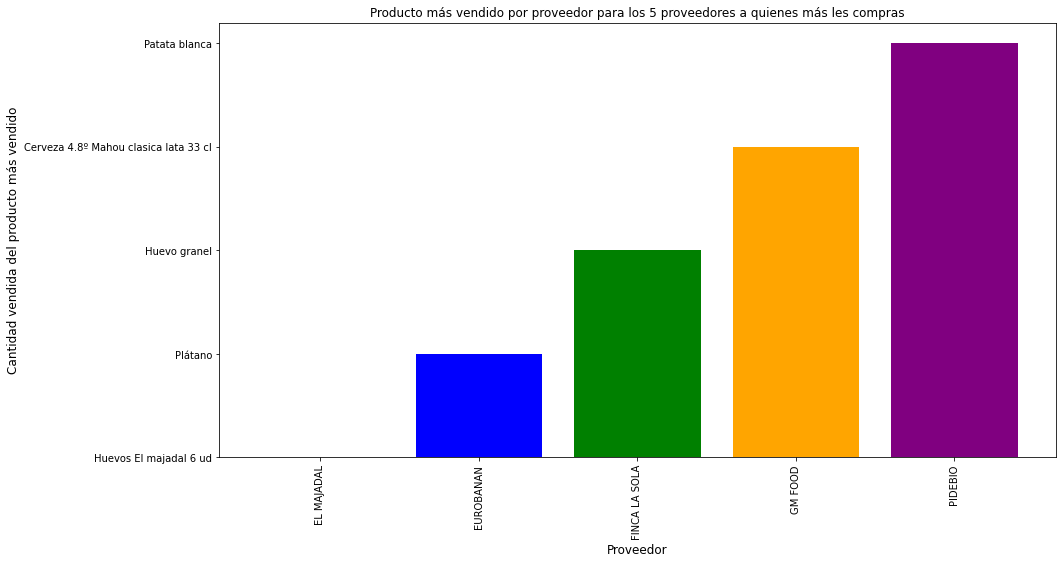

In [91]:
# Grafica los resultados

fig, ax = plt.subplots(figsize=(15, 8))
plt.bar(producto_mas_vendido.index , producto_mas_vendido.values, color=['red', 'blue', 'green', 'orange', 'purple'])
plt.xlabel('Proveedor', fontsize=12)
plt.ylabel('Cantidad vendida del producto más vendido', fontsize=12)
plt.title('Producto más vendido por proveedor para los 5 proveedores a quienes más les compras')
plt.xticks(rotation=90)
plt.show()